In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x_path = '../../data/X.txt'
y_path = '../../data/Y.txt'

In [26]:
x=pd.read_csv(x_path,sep=';')
y=pd.read_csv(y_path,sep=';')

In [27]:
x.head()

,Year,IsDayBin,Month,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,2016,Night,1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,2016,Night,1,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,2016,Night,1,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,2016,Night,1,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,2016,Night,1,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


In [28]:
y.head()

,WindPower,PVPower
R1,396.352,0.0
R2,417.778,0.0
R3,434.581,0.0
R4,448.482,0.0
R5,465.790,0.0


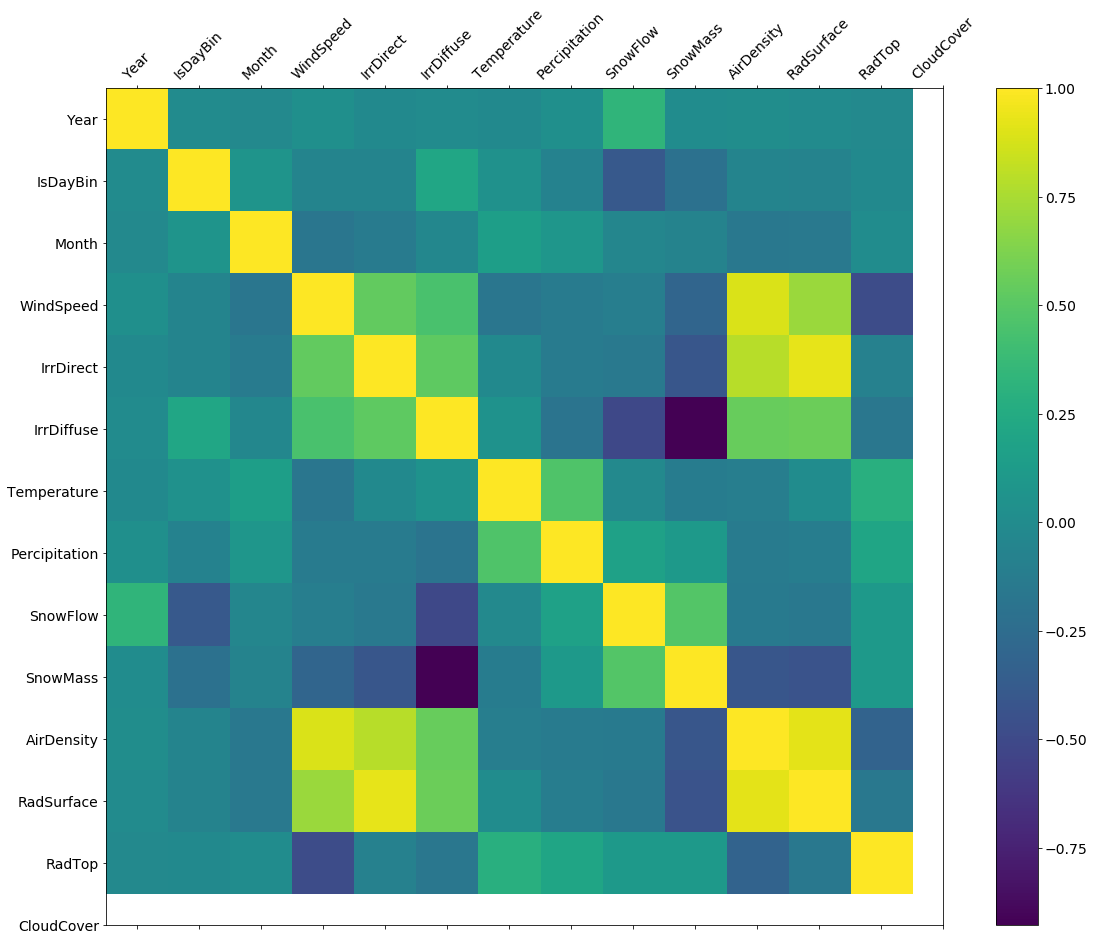

In [30]:
f = plt.figure(figsize=(19, 15))
plt.matshow(x.corr(), fignum=f.number)
plt.xticks(range(x.shape[1]), x.columns, fontsize=14, rotation=45)
plt.yticks(range(x.shape[1]), x.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [23]:
x['IsDayBin'].unique()

array(['Night', 'Day'], dtype=object)

In [6]:
X=x.drop(['Year','IsDayBin','Month'],axis=1)
Y=y.drop(['PVPower'],axis=1)

In [7]:
X.head()

,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


# Converting dataframes to numpy array 

In [8]:
X=X.values
Y=Y.values

# Split the dataset into training and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=42)

# INTRODUCTION
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. Is used to predict values within a continuous range. (e.g. sales, price) 

<b>Simple Regression:</b> Simple linear regression uses traditional slope-intercept form, where $m$ and $b$ are the variables our algorithm will try to “learn” to produce the most accurate predictions. $x$ represents our input data and $y$ represents our prediction.

$$\hat {y}=\theta_{1}x+\theta_{0}$$

In order to compute the values of $m$ and $b$ we need to minimize a cost function. In the case of Linear Regression it is given by

$$J(\theta) = \frac{1}{2m}\sum_{i=i}^{m}(\hat {y}_{i}-y_{i})^{2}$$

<img src='./images/lr.jpg'>

In multivariate regression we seek a set of parameters 

$$\textbf{$\Theta$} = [\theta_{0} \quad \theta_{1} \quad \cdots \quad \theta_{i} \quad \cdots \quad \theta_{m}]^{T}$$
               
which minimizes the the cost function:
Hypothesis 
$\textbf{H}=\textbf{X $\Theta$}$

Cost function is

$$\textbf{J($\Theta$)}=\frac{1}{2m}(\textbf{X$\Theta$} -\textbf{Y})^{T}(\textbf{X$\Theta$} -\textbf{Y})$$

The advantages of Linear Regression are that they computationally efficient, simple and easy to interpret. However, the algorithm fails to capture non-linear behavior.


# Use sklearn library to build a linear model

In [10]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)
print("Theta calculated by SK-learn regression ",lr.coef_)

Theta calculated by SK-learn regression  [[ 1.95216975e+02  2.57690337e+01  3.61530091e+01 -6.90881131e-01
   9.92253398e+00 -3.67636864e+00  4.32607036e-02 -1.93687169e+02
  -4.63682848e-02  3.03297654e-02 -5.86988441e+00]]


In [11]:
X_padded = np.column_stack((np.ones((len(X_train),1)), X_train))

# Solution using Normal Equation

$$\theta=(X^{T}X)^{-1}X^{T}Y$$

In [12]:
# Solve using direct method
def normalEqn(X, y):  
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return theta

In [13]:
theta_Normal = normalEqn(X_padded, Y_train)
print("Theta calculated by Normal Equation ",theta_Normal)

Theta calculated by Normal Equation  [[-4.36947632e+02]
 [ 1.95216975e+02]
 [ 2.57690337e+01]
 [ 3.61530091e+01]
 [-6.90881129e-01]
 [ 9.92253398e+00]
 [-3.67636863e+00]
 [ 4.32607036e-02]
 [-1.93687168e+02]
 [-4.63682848e-02]
 [ 3.03297654e-02]
 [-5.86988441e+00]]


# Cost Function involving multiple variables
$$\textbf{J($\Theta$)}=\frac{1}{2m}(\textbf{X$\Theta$} -\textbf{Y})^{T}(\textbf{X$\Theta$} -\textbf{Y})$$

In [14]:
def computeCost(X,y,theta): 
  m=len(y)
  Cost=0.0;
  Cost=1.0/2.0/m*np.sum((X.dot(theta)-y)**2);
  return Cost;

# Batch Gradient Descent
Minimize the loss function using gradient descent. 
<img src='./images/gd.jpg'>

In [15]:
def gradientDescent(X, y, alpha, num_iters):
    m,n = X.shape
    theta = np.zeros((X.shape[1],1))
    Cost_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))    
        Cost_history[i] = computeCost(X, y, theta)
    return theta, Cost_history

In [16]:
def SolveGradientDescent(X,y,alpha, num_iters):
    m,n=X.shape
    theta, Loss_history = gradientDescent(X, y, alpha, num_iters)
    plt.plot(range(Loss_history.size), Loss_history, "-b", linewidth=2 )
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.show(block=False)
    theta.shape
    return theta

/Users/adil/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/adil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


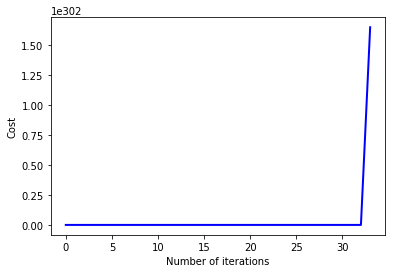

In [17]:
theta_GD=SolveGradientDescent(X=X_padded,y=Y_train.flatten(),alpha=0.1,num_iters=70)

In [ ]:
print('Theta computed from gradient descent: ',theta_GD.T)